In [117]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

import sys, os
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())
from tslb.src.lzw import *
from tslb.src.utils import *
from tslb.src.regModel import regModel as regModel

In [40]:
df1 = pd.read_csv("../data/bitcoin-paper-data/price-data-02-15-2014-06-11-2014.csv")
df2 = pd.read_csv("../data/bitcoin-paper-data/price-data-11-30-2014-04-28-2015.csv")
df3 = pd.read_csv("../data/bitcoin-paper-data/price-data-12-17-2015-06-30-2016.csv")

df = pd.concat([df1[['timestamp', 'ask', 'bid']], df2[['timestamp', 'ask', 'bid']], df3[['timestamp', 'ask', 'bid']]], axis=0)
df['time'] = pd.to_datetime(df['timestamp'],unit='s')

In [65]:
data = df1[['timestamp','price']]
data.index = pd.to_datetime(data['timestamp'], unit='s')

In [132]:
y_t = data.shift(-1).price - data.price
x_t = pd.Series(index = y_t.index, dtype=int)
x_t[y_t == 0] = 0
x_t[y_t > 0] = 1
x_t[y_t < 0] = 2

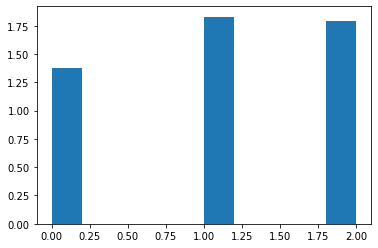

In [133]:
plt.hist(x_t, density=True)
plt.show()

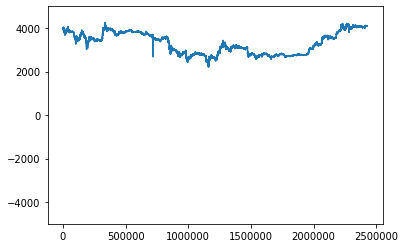

In [120]:
plt.plot(df1.price)
plt.ylim(-5000,5000)
plt.show()

In [166]:
train = x_t[(x_t.index > pd.to_datetime("2/16/2014"))&(x_t.index < pd.to_datetime("3/14/2014"))]

In [174]:
n = 3
samples = 100
size = 2 ** 14
#############

myRegModel = regModel(n, size, samples)
myRegModel.fit(plot=False)

lbs=[]
for i in np.arange(1,len(train)-size, size):
    uncomp_numbers = train[i:i+size].values
    ratio = lzw_compression_ratio(uncomp_numbers, n)
    ent = myRegModel.get_entropy(ratio, "a multinomial sequence", False)
    lb = h_inverse(ent, n, a=0.001)
    lbs.append(lb)

compression ratio:  0.1561279296875
compression ratio:  0.15478515625
compression ratio:  0.16339111328125
compression ratio:  0.15576171875
compression ratio:  0.153564453125
compression ratio:  0.1640625
compression ratio:  0.16461181640625
compression ratio:  0.16058349609375
compression ratio:  0.16571044921875
compression ratio:  0.16412353515625
compression ratio:  0.162841796875
compression ratio:  0.158935546875
compression ratio:  0.1585693359375
compression ratio:  0.16339111328125
compression ratio:  0.1612548828125
compression ratio:  0.1611328125
compression ratio:  0.16058349609375
compression ratio:  0.160888671875
compression ratio:  0.16351318359375
compression ratio:  0.16064453125
compression ratio:  0.15960693359375
compression ratio:  0.16943359375
compression ratio:  0.154052734375
compression ratio:  0.1436767578125
compression ratio:  0.16119384765625
compression ratio:  0.16204833984375
compression ratio:  0.15093994140625
compression ratio:  0.16033935546875
c

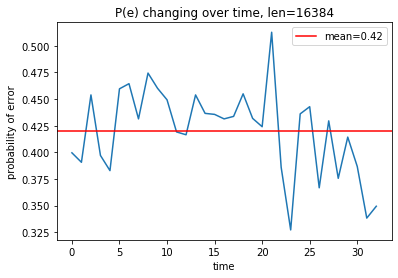

In [175]:
plt.title("P(e) changing over time, len={}".format(size))
plt.plot(lbs)
plt.axhline(np.mean(lbs), color="red", label="mean={}".format(np.mean(lbs).round(3)))
plt.xlabel("time")
plt.ylabel("probability of error")
plt.legend()
plt.show()

In [171]:
n = 3
samples = 100
size = 2 ** 12
#############

myRegModel = regModel(n, size, samples)
myRegModel.fit(plot=False)

lbs=[]
for i in np.arange(1,len(train)-size, size):
    uncomp_numbers = train[i:i+size].values
    ratio = lzw_compression_ratio(uncomp_numbers, n)
    ent = myRegModel.get_entropy(ratio, "a multinomial sequence", False)
    lb = h_inverse(ent, n, a=0.001)
    lbs.append(lb)

compression ratio:  0.196533203125
compression ratio:  0.2080078125
compression ratio:  0.185302734375
compression ratio:  0.17822265625
compression ratio:  0.185546875
compression ratio:  0.193603515625
compression ratio:  0.19384765625
compression ratio:  0.194091796875
compression ratio:  0.19921875
compression ratio:  0.202880859375
compression ratio:  0.201171875
compression ratio:  0.204345703125
compression ratio:  0.197021484375
compression ratio:  0.16748046875
compression ratio:  0.196044921875
compression ratio:  0.2080078125
compression ratio:  0.202880859375
compression ratio:  0.18798828125
compression ratio:  0.17822265625
compression ratio:  0.18994140625
compression ratio:  0.1982421875
compression ratio:  0.208251953125
compression ratio:  0.208740234375
compression ratio:  0.192138671875
compression ratio:  0.200439453125
compression ratio:  0.206298828125
compression ratio:  0.2021484375
compression ratio:  0.201171875
compression ratio:  0.19091796875
compression r

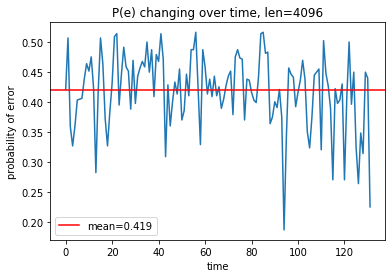

In [173]:
plt.title("P(e) changing over time, len={}".format(size))
plt.plot(lbs)
plt.axhline(np.mean(lbs), color="red", label="mean={}".format(np.mean(lbs).round(3)))
plt.xlabel("time")
plt.ylabel("probability of error")
plt.legend()
plt.show()

In [180]:
n = 3
samples = 100
size = 2 ** 7
#############

myRegModel = regModel(n, size, samples)
myRegModel.fit(plot=False)

lbs=[]
for i in np.arange(1,len(train)-size, size):
    uncomp_numbers = train[i:i+size].values
    ratio = lzw_compression_ratio(uncomp_numbers, n)
    ent = myRegModel.get_entropy(ratio, "a multinomial sequence", False)
    lb = h_inverse(ent, n, a=0.001)
    lbs.append(lb)

compression ratio:  0.359375
compression ratio:  0.3984375
compression ratio:  0.421875
compression ratio:  0.3984375
compression ratio:  0.375
compression ratio:  0.390625
compression ratio:  0.4296875
compression ratio:  0.40625
compression ratio:  0.3359375
compression ratio:  0.3671875
compression ratio:  0.40625
compression ratio:  0.421875
compression ratio:  0.3828125
compression ratio:  0.390625
compression ratio:  0.3828125
compression ratio:  0.3984375
compression ratio:  0.4140625
compression ratio:  0.3828125
compression ratio:  0.3984375
compression ratio:  0.3984375
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.421875
compression ratio:  0.3984375
compression ratio:  0.3984375
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.3828125
compression ratio:  0.40625
compression ratio:  0.3828125
compression ratio:  0.3671875
compression ratio:  0.3828125
compression ratio:  0.3671875
compression ratio:  0.38281

compression ratio:  0.421875
compression ratio:  0.4296875
compression ratio:  0.421875
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.375
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.40625
compression ratio:  0.3984375
compression ratio:  0.40625
compression ratio:  0.40625
compression ratio:  0.4140625
compression ratio:  0.40625
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.40625
compression ratio:  0.3984375
compression ratio:  0.4140625
compression ratio:  0.3984375
compression ratio:  0.3984375
compression ratio:  0.3984375
compression ratio:  0.40625
compression ratio:  0.3984375
compression ratio:  0.2421875
compression ratio:  0.3671875
compression ratio:  0.328125
compression ratio:  0.3671875
compression ratio:  0.40625
co

compression ratio:  0.375
compression ratio:  0.375
compression ratio:  0.40625
compression ratio:  0.4296875
compression ratio:  0.390625
compression ratio:  0.3984375
compression ratio:  0.390625
compression ratio:  0.3671875
compression ratio:  0.4140625
compression ratio:  0.3984375
compression ratio:  0.4140625
compression ratio:  0.3984375
compression ratio:  0.40625
compression ratio:  0.3984375
compression ratio:  0.4453125
compression ratio:  0.390625
compression ratio:  0.296875
compression ratio:  0.4140625
compression ratio:  0.359375
compression ratio:  0.3671875
compression ratio:  0.390625
compression ratio:  0.3359375
compression ratio:  0.28125
compression ratio:  0.3046875
compression ratio:  0.3671875
compression ratio:  0.3984375
compression ratio:  0.4296875
compression ratio:  0.4375
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.40625
compression ratio:  0.40625
compression ratio:  0.4296875
compress

compression ratio:  0.359375
compression ratio:  0.3828125
compression ratio:  0.421875
compression ratio:  0.4296875
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.40625
compression ratio:  0.3828125
compression ratio:  0.40625
compression ratio:  0.4296875
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.4296875
compression ratio:  0.4140625
compression ratio:  0.40625
compression ratio:  0.390625
compression ratio:  0.3671875
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.40625
compression ratio:  0.4375
compression ratio:  0.421875
compression ratio:  0.4296875
compression ratio:  0.421875
compression ratio:  0.3984375
compression ratio:  0.40625
compression ratio:  0.421875
compression ratio:  0.421875
compression ratio:  0.4140625
compression ratio:  0.3984375
compression ratio:  0.421875
compression ratio:  0.3828125
compression ratio:  0.375
compres

compression ratio:  0.40625
compression ratio:  0.3984375
compression ratio:  0.4375
compression ratio:  0.3984375
compression ratio:  0.3984375
compression ratio:  0.40625
compression ratio:  0.375
compression ratio:  0.421875
compression ratio:  0.4296875
compression ratio:  0.4453125
compression ratio:  0.3828125
compression ratio:  0.3984375
compression ratio:  0.4140625
compression ratio:  0.3984375
compression ratio:  0.421875
compression ratio:  0.3984375
compression ratio:  0.421875
compression ratio:  0.421875
compression ratio:  0.375
compression ratio:  0.3828125
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.40625
compression ratio:  0.4140625
compression ratio:  0.3671875
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.4296875
compression ratio:  0.40625
compression ratio:  0.4296875
compression ratio:  0.421875
compression ratio:  0.375
compression ratio:  0.390625
compression ratio:  0.4140625
compressi

compression ratio:  0.3671875
compression ratio:  0.4296875
compression ratio:  0.421875
compression ratio:  0.390625
compression ratio:  0.3984375
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.390625
compression ratio:  0.3203125
compression ratio:  0.3203125
compression ratio:  0.3828125
compression ratio:  0.3984375
compression ratio:  0.3828125
compression ratio:  0.3984375
compression ratio:  0.3671875
compression ratio:  0.375
compression ratio:  0.3671875
compression ratio:  0.3984375
compression ratio:  0.40625
compression ratio:  0.3359375
compression ratio:  0.3671875
compression ratio:  0.3984375
compression ratio:  0.3515625
compression ratio:  0.3984375
compression ratio:  0.421875
compression ratio:  0.40625
compression ratio:  0.421875
compression ratio:  0.40625
compression ratio:  0.375
compression ratio:  0.421875
compression ratio:  0.3984375
compression ratio:  0.3515625
compression ratio:  0.421875
compression ratio:  0.390625
co

compression ratio:  0.40625
compression ratio:  0.4296875
compression ratio:  0.4140625
compression ratio:  0.4296875
compression ratio:  0.421875
compression ratio:  0.4140625
compression ratio:  0.4375
compression ratio:  0.421875
compression ratio:  0.4296875
compression ratio:  0.4296875
compression ratio:  0.3828125
compression ratio:  0.40625
compression ratio:  0.4140625
compression ratio:  0.2421875
compression ratio:  0.3984375
compression ratio:  0.390625
compression ratio:  0.3359375
compression ratio:  0.1953125
compression ratio:  0.375
compression ratio:  0.3515625
compression ratio:  0.375
compression ratio:  0.3828125
compression ratio:  0.34375
compression ratio:  0.40625
compression ratio:  0.390625
compression ratio:  0.390625
compression ratio:  0.4140625
compression ratio:  0.3828125
compression ratio:  0.3828125
compression ratio:  0.4140625
compression ratio:  0.3671875
compression ratio:  0.390625
compression ratio:  0.2265625
compression ratio:  0.34375
compres

compression ratio:  0.359375
compression ratio:  0.40625
compression ratio:  0.3984375
compression ratio:  0.3984375
compression ratio:  0.375
compression ratio:  0.3984375
compression ratio:  0.4140625
compression ratio:  0.3671875
compression ratio:  0.3984375
compression ratio:  0.3984375
compression ratio:  0.3984375
compression ratio:  0.375
compression ratio:  0.3984375
compression ratio:  0.421875
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.390625
compression ratio:  0.3828125
compression ratio:  0.390625
compression ratio:  0.390625
compression ratio:  0.3828125
compression ratio:  0.40625
compression ratio:  0.3828125
compression ratio:  0.3828125
compression ratio:  0.3984375
compression ratio:  0.3671875
compression ratio:  0.390625
compression ratio:  0.4140625
compression ratio:  0.40625
compression ratio:  0.421875
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.3984375
compression ratio:  0.390625
com

compression ratio:  0.421875
compression ratio:  0.421875
compression ratio:  0.3828125
compression ratio:  0.3671875
compression ratio:  0.3984375
compression ratio:  0.3828125
compression ratio:  0.390625
compression ratio:  0.3984375
compression ratio:  0.4140625
compression ratio:  0.3671875
compression ratio:  0.3828125
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.40625
compression ratio:  0.3984375
compression ratio:  0.3984375
compression ratio:  0.4296875
compression ratio:  0.40625
compression ratio:  0.40625
compression ratio:  0.4296875
compression ratio:  0.3984375
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.40625
compression ratio:  0.4140625
compression ratio:  0.3984375
compression ratio:  0.421875
compression ratio:  0.421875
compression ratio:  0.4140625
compression ratio:  0.40625
compression ratio:  0.4140625
compression ratio:  0.42968

compression ratio:  0.421875
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.4140625
compression ratio:  0.40625
compression ratio:  0.421875
compression ratio:  0.421875
compression ratio:  0.421875
compression ratio:  0.390625
compression ratio:  0.3984375
compression ratio:  0.3984375
compression ratio:  0.421875
compression ratio:  0.421875
compression ratio:  0.4296875
compression ratio:  0.4296875
compression ratio:  0.4296875
compression ratio:  0.375
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.421875
compression ratio:  0.3984375
compression ratio:  0.421875
compression ratio:  0.4140625
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.40625
compression ratio:  0.40625
compression ratio:  0.40625
compression ratio:  0.4296875
compression ratio:  0.40625
compression ratio:  0.4296875
compression ratio:  0.421875
compres

compression ratio:  0.4140625
compression ratio:  0.4375
compression ratio:  0.421875
compression ratio:  0.3984375
compression ratio:  0.3359375
compression ratio:  0.3671875
compression ratio:  0.296875
compression ratio:  0.3515625
compression ratio:  0.3828125
compression ratio:  0.3671875
compression ratio:  0.2890625
compression ratio:  0.25
compression ratio:  0.3125
compression ratio:  0.375
compression ratio:  0.390625
compression ratio:  0.3984375
compression ratio:  0.40625
compression ratio:  0.375
compression ratio:  0.3359375
compression ratio:  0.359375
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.3984375
compression ratio:  0.40625
compression ratio:  0.3984375
compression ratio:  0.3203125
compression ratio:  0.34375
compression ratio:  0.359375
compression ratio:  0.390625
compression ratio:  0.40625
compression ratio:  0.3984375
compression ratio:  0.375
compression ratio:  0.3671875
compression ratio:  0.40625
compression ratio:  

compression ratio:  0.3984375
compression ratio:  0.3984375
compression ratio:  0.375
compression ratio:  0.2890625
compression ratio:  0.375
compression ratio:  0.3359375
compression ratio:  0.390625
compression ratio:  0.40625
compression ratio:  0.3828125
compression ratio:  0.40625
compression ratio:  0.3984375
compression ratio:  0.3828125
compression ratio:  0.3125
compression ratio:  0.4140625
compression ratio:  0.3828125
compression ratio:  0.265625
compression ratio:  0.3359375
compression ratio:  0.3046875
compression ratio:  0.3359375
compression ratio:  0.3671875
compression ratio:  0.3828125
compression ratio:  0.3203125
compression ratio:  0.375
compression ratio:  0.328125
compression ratio:  0.3828125
compression ratio:  0.390625
compression ratio:  0.390625
compression ratio:  0.34375
compression ratio:  0.34375
compression ratio:  0.3984375
compression ratio:  0.3984375
compression ratio:  0.375
compression ratio:  0.3828125
compression ratio:  0.34375
compression ra

compression ratio:  0.421875
compression ratio:  0.34375
compression ratio:  0.375
compression ratio:  0.359375
compression ratio:  0.40625
compression ratio:  0.3671875
compression ratio:  0.3671875
compression ratio:  0.390625
compression ratio:  0.3671875
compression ratio:  0.3984375
compression ratio:  0.375
compression ratio:  0.3125
compression ratio:  0.328125
compression ratio:  0.3984375
compression ratio:  0.359375
compression ratio:  0.3828125
compression ratio:  0.3125
compression ratio:  0.2734375
compression ratio:  0.3203125
compression ratio:  0.2890625
compression ratio:  0.3515625
compression ratio:  0.3203125
compression ratio:  0.1953125
compression ratio:  0.2578125
compression ratio:  0.375
compression ratio:  0.34375
compression ratio:  0.296875
compression ratio:  0.359375
compression ratio:  0.40625
compression ratio:  0.375
compression ratio:  0.359375
compression ratio:  0.2734375
compression ratio:  0.34375
compression ratio:  0.3984375
compression ratio:  

compression ratio:  0.3984375
compression ratio:  0.421875
compression ratio:  0.375
compression ratio:  0.3984375
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.40625
compression ratio:  0.40625
compression ratio:  0.421875
compression ratio:  0.4140625
compression ratio:  0.3828125
compression ratio:  0.3828125
compression ratio:  0.421875
compression ratio:  0.421875
compression ratio:  0.421875
compression ratio:  0.4140625
compression ratio:  0.421875
compression ratio:  0.3828125
compression ratio:  0.390625
compression ratio:  0.359375
compression ratio:  0.390625
compression ratio:  0.3984375
compression ratio:  0.40625
compression ratio:  0.3984375
compression ratio:  0.4296875
compression ratio:  0.421875
compression ratio:  0.390625
compression ratio:  0.40625
compression ratio:  0.3671875
compression ratio:  0.40625
compression ratio:  0.4140625
compression ratio:  0.3984375
compression ratio:  0.3984375
compression ratio:  0.390625
compres

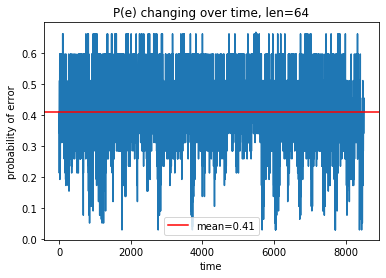

In [179]:
plt.title("P(e) changing over time, len={}".format(size))
plt.plot(lbs)
plt.axhline(np.mean(lbs), color="red", label="mean={}".format(np.mean(lbs).round(3)))
plt.xlabel("time")
plt.ylabel("probability of error")
plt.legend()
plt.show()

In [208]:
x = -123
indicator = x
out = 0

while (indicator*x > 0):
    out = out*10
    a = x%10
    x = int((x - a)/10)
    out = out+a
    print(out)

7
77
778
7789
77899
778999
7789999
77899999
778999999
7789999999
77899999999
778999999999
7789999999999
77899999999999
778999999999999
7789999999999999
77899999999999999
778999999999999999
7789999999999999999
77899999999999999999
778999999999999999999
7789999999999999999999
77899999999999999999999
778999999999999999999999
7789999999999999999999999
77899999999999999999999999
778999999999999999999999999
7789999999999999999999999999
77899999999999999999999999999
778999999999999999999999999999
7789999999999999999999999999999
77899999999999999999999999999999
778999999999999999999999999999999
7789999999999999999999999999999999
77899999999999999999999999999999999
778999999999999999999999999999999999
7789999999999999999999999999999999999
77899999999999999999999999999999999999
778999999999999999999999999999999999999
7789999999999999999999999999999999999999
77899999999999999999999999999999999999999
778999999999999999999999999999999999999999
7789999999999999999999999999999999999999999
77899999999

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




778999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [236]:
nums=[1,1,2,2,2,2,3,4,5,5,5,6,7]
removeDuplicates(nums)

[1, 2, 3, 4, 5, 6, 7]

In [235]:
def removeDuplicates(nums):
    i = 0
    while len(nums) > i+1:
        while nums[i] - nums[i+1] == 0:
            nums.pop(i+1)
        i = i+1
    return nums

In [228]:
nums

[1, 2, 3, 4, 5, 6]

In [211]:
nums.pop(1)

1

In [213]:
nums.pop(1)

2

In [214]:
nums

[1]